In [133]:
import pandas as pd
import ast
import numpy as np
from detecto import core, utils, visualize
from tqdm import tqdm
import cv2

In [ ]:
data = pd.read_csv('data/train.csv')
fn, w, h, cl, boxes, imgid = [], [], [], [], [], []
counter = 0
for i in range(300):
    idx = int(data['ImageID'].iloc[i])
    bbox = ast.literal_eval(data['bboxes'].iloc[i])
    for box in bbox:
        fn.append(f'{idx}.jpg')
        w.append(512)
        h.append(512)
        cl.append('debris')
        boxes.append(box)
        imgid.append(counter)
        counter += 1
boxes = np.array(boxes).T
pd.DataFrame(
    {'filename':fn, 
     'width' : w, 
     'height' : h, 
     'class' : cl,
     'xmin' : boxes[0],
     'ymin' : boxes[2],
     'xmax' : boxes[1],
     'ymax':boxes[3],
     'image_id':imgid
    }
).to_csv('data/labels.csv',index = False)

In [166]:
dataset = core.Dataset('data/labels.csv','data/train')
model = core.Model(['debris'],pretrained = False)
m = model.fit(dataset,epochs=10, learning_rate=0.001, lr_step_size=5,verbose = True)

  0%|                                                                                 | 1/1137 [00:00<02:11,  8.66it/s]

Epoch 1 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:05,  8.20it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<01:58,  9.61it/s]

Loss: 0.28688981193442675
Epoch 2 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:05,  8.13it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<01:58,  9.57it/s]

Loss: 0.33004610188478645
Epoch 3 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:04,  8.51it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<01:59,  9.48it/s]

Loss: 0.3098746075533157
Epoch 4 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:04,  8.69it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<02:12,  8.55it/s]

Loss: 0.3275027410235516
Epoch 5 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:04,  8.40it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<02:01,  9.39it/s]

Loss: 0.30971814588058827
Epoch 6 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:05,  8.20it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<02:01,  9.39it/s]

Loss: 0.3489298879407173
Epoch 7 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:05,  8.23it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<02:04,  9.09it/s]

Loss: 0.36448578640472057
Epoch 8 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:05,  8.13it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<02:05,  9.05it/s]

Loss: 0.3644688177940457
Epoch 9 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:04,  8.40it/s]

Begin iterating over validation dataset


  0%|                                                                                 | 1/1137 [00:00<02:04,  9.13it/s]

Loss: 0.3669468538705693
Epoch 10 of 10
Begin iterating over training dataset


  2%|█▉                                                                                 | 1/43 [00:00<00:05,  8.33it/s]

Begin iterating over validation dataset


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:03<00:00, 11.95it/s]

Loss: 0.3705449045397515


In [169]:
out = []
for i in tqdm(range(5000)):
    image = utils.read_image(f'data/test/{i}.jpg')
    labels, boxes, scores = model.predict(image)
    bb = []
    for u,box in enumerate(boxes):
        box = box.cpu().tolist()
        bb.append([box[0],box[2],box[1],box[3],float(scores[u]+0.2 if scores[u]+0.2 <= 1 else 1)])
    out.append(bb)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [06:02<00:00, 13.81it/s]


In [170]:
def draw_bboxes(img, bboxes, train,color=(255, 0, 0), thickness=1):
    for u, bbox in enumerate(bboxes):
        # if [x1, y1, x2, y2]
        img = cv2.rectangle(img, (int(bbox[0]),int(bbox[2])), (int(bbox[1]),int(bbox[3])), color, thickness)
    return img

<Figure size 432x288 with 0 Axes>

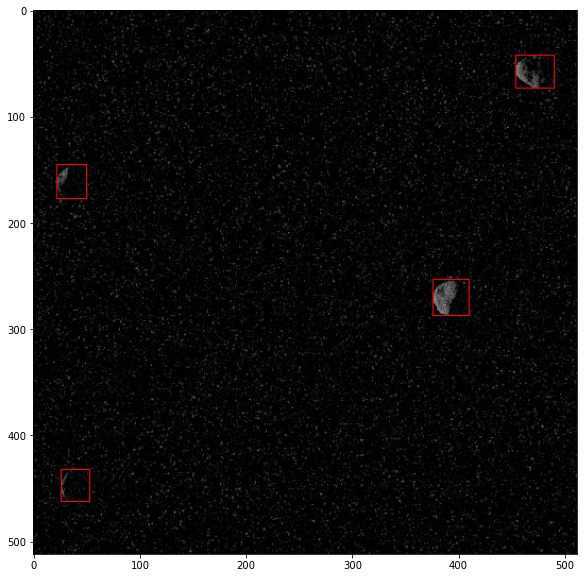

In [171]:
num = 5
i = utils.read_image(f'data/test/{num}.jpg')
#i = cv2.flip(i,0)
image = draw_bboxes(i,out[num],True)
#image = draw_bboxes(image,t[num],False,(0,255,0))
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(image)

In [172]:
df = pd.read_csv('data/sample_submission.csv')
df.bboxes = out
df.to_csv('submission.csv',index = False)